# GUTS-RNA-pulse substance specific

## Problem formulation

Risk assessment of chemicals needs to get away from making retrospective assessments after evaluating the effects of chemicals on ecosystems or on individuals to derive safe test concentrations. This need is one hand mandated by the desire for healthy ecosystems, the precautionary principle and ethical considerations to reduce animal testing.

With this model we investigate the potential to integrate omics data into the existing general unified threshold model for survival (GUTS) [Jager.2011, Jager.2018], which is considered ready for use in environmental risk assessment [EFSA.2018].

The growing availability of 'omics data drives the abstraction of bio-physical insights into the processes that govern molecular responses to changing environments.
The integration of 'omics data into mechanistic models therefore offers a promising solution for advancing risk assessment for chemicals and chemical mixtures, because in theory it can connect the cellular processes induced after toxicant exposure with observed effects in the organism [Perkins.2019,Murphy.2018].
Integrating such approaches into existing mechanistic modeling frameworks envisions the prediction of toxicant effects for untested species--substance combinations and mixtures as a very desirable long-term goal for a predictive environmental risk assessment.

The GUTS-RNA-pulse model is the first approach to integrate time-resolved gene-expression data (Nrf2 fold-change) into a GUTS model. 

### Target audience | model aims

It is aimed at researchers in the field of environmental risk assessment. It is in an early stage of scientific development and serves as a proof of principle. The model is designated to investigate the process dynamics and the interplay between chemical uptake and metabolization and their interactions with gene-expression dynamics. 

The aim of the model is to obtain a better understanding on modeling the temporal dynamics from exposure to effect with multiple intermediate steps. Incorporation of intermediate steps in the model fitting, forces the modellers to incorporate more realistic assumptions of biological processes and step-by-step move to better approximations of the reality.

### Operability range

It can be used to extrapolate internal concentrations, Nrf2 fold-changes, survival rates forward in time and for untested concentrations. The model it is not ready to be used outside of the range of the calibrated chemicals and should not be used for predictions of untested chemicals. 


## Model description

### Synopsis

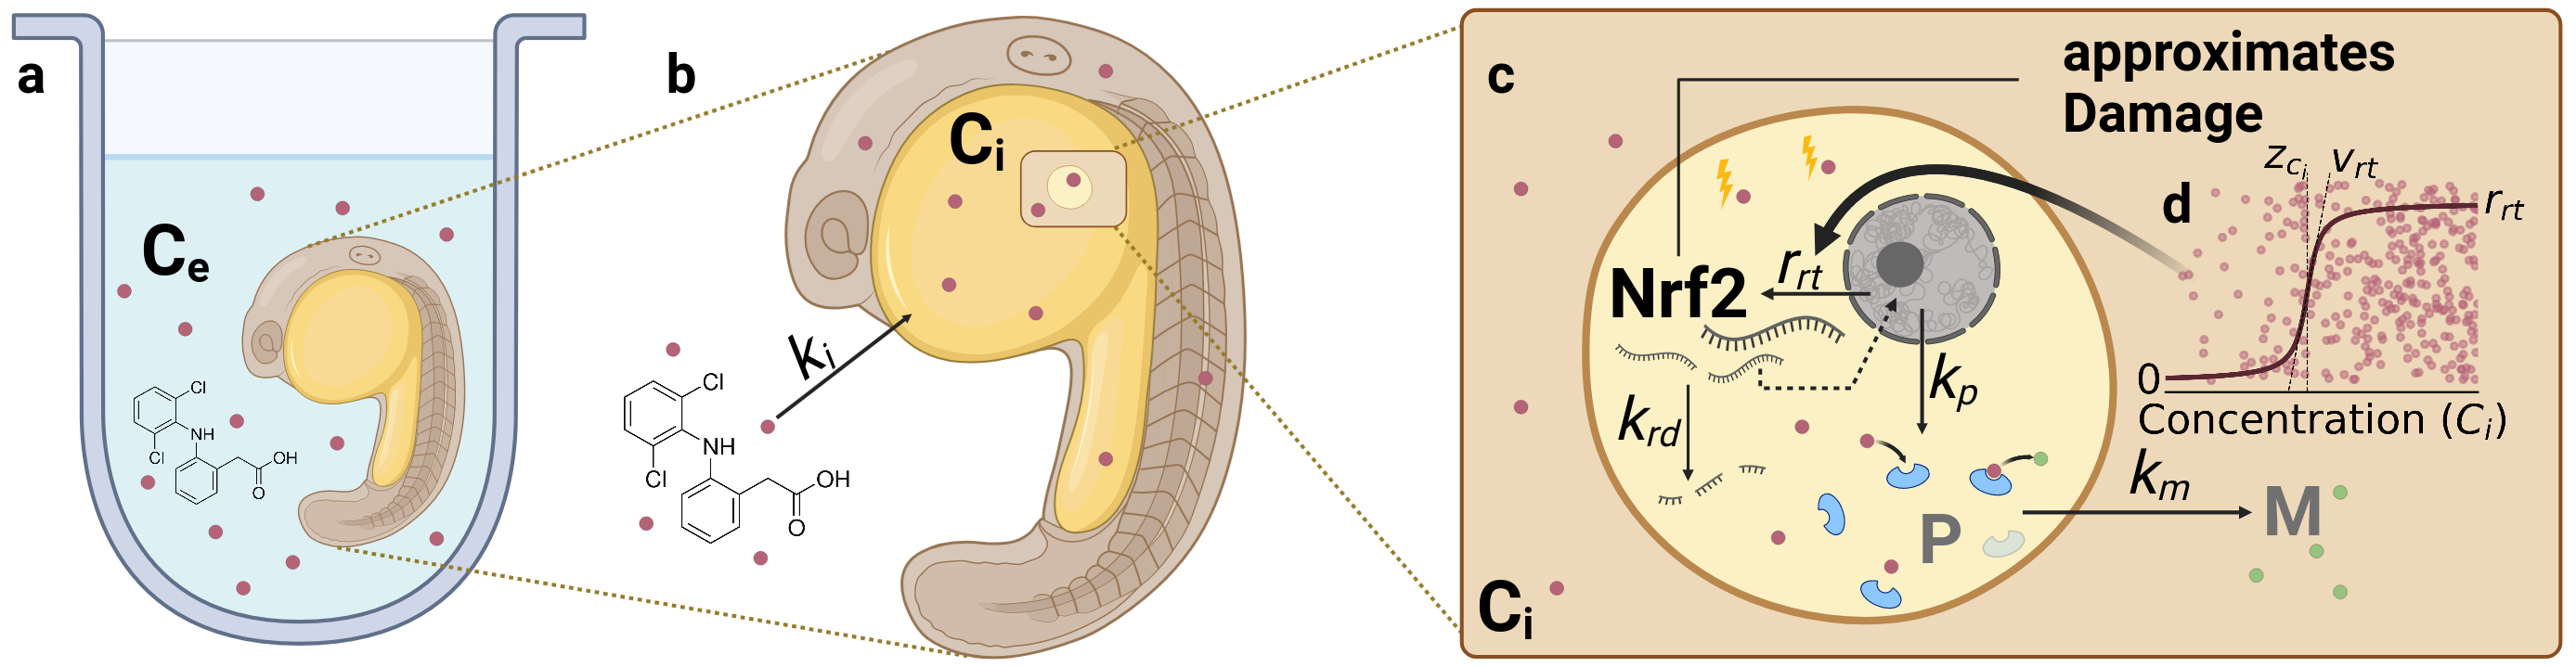

Figure 1. Graphical model description. Created with [Biorender.com](https://biorender.com)

The model RNA-pulse describes the damage dynamic as a gene-expression pulse that is calibrated on *nrf2* expression data. It uses a sigmoid function to model the threshold dependent activation of *nrf2* expression and a concentration dependent exponential decay of *nrf2* molecules. Coupled with active metabolization of the internal concentration of the chemical this leads to a pulse like behavior. In addition *nrf2* serves as a proxy for toxicodynamic damage in the standard GUTS survival model of stochastic death.

### Detailed model description

$$
\begin{align}
\frac{dC_i}{dt} &= k_i~C_e - k_m~C_i~P \\
\frac{dR}{dt} &= r_{rt}~\text{activation}(C_i,~C_{i,max},~ z_{ci},~ v_{rt}) - k_{rd} ~ (R - R_0) \\
\frac{dP}{dt} &= k_p~ ((R - R_0) - P) \\
h(t) &= k_k~ max(0, R(t) - z) +  h_b \\
S(t) &= e^{-\int_0^t h(t) dt}
\end{align}
$$

#### Uptake and elimination kinetics

Uptake and elimination kinetics (Eq. 1) are determined by the uptake rate constant $k_i$, which exclusively depends on the external concentration $C_e$. Although external concentrations were measured for those datasets where internal concentrations were available, a we chose not to model uptake from the environment and decay, because the observed environmental concentrations were relatively stable and Diuron and Naproxen are known to be stable compounds [Giacomazzi.2004,Wojcieszynska.2020] and Diclofenac has a DT50 of 8 days, but was also observed stable in the experiments.

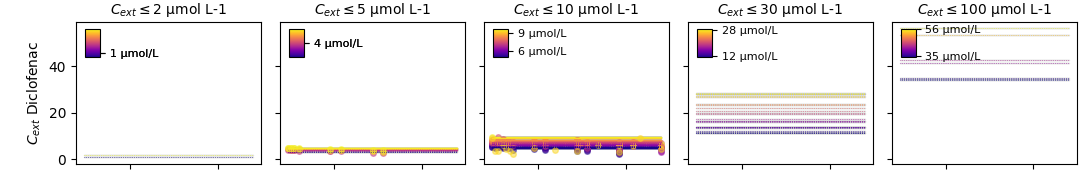

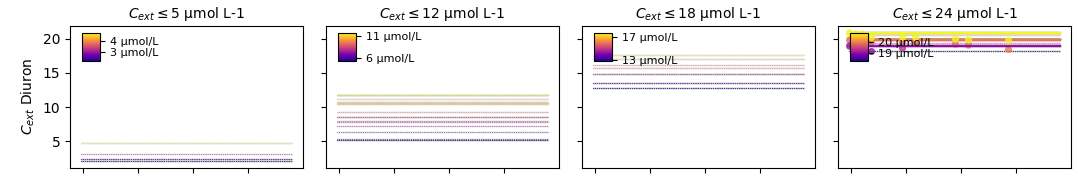

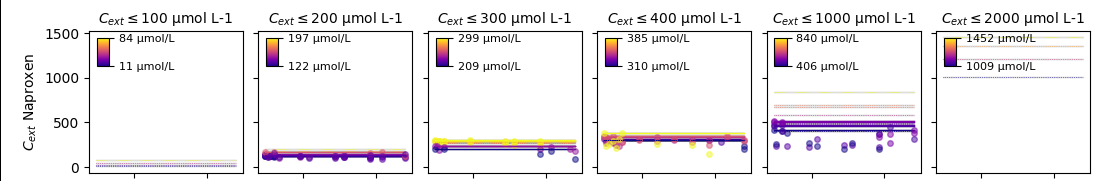

Figure 2. Environmental concentrations over time for the assessed chemicals Diclofenach, Diuron and Naproxen.  

The latter (detoxification) term $k_m~C_i~P$ can be understood as a Michaelis-Menten enzyme kinetic for relatively low substrate concentrations $C_i$ (Fig. 1). Passive chemical decay, independent of the $P$ concentration, is not considered in this model.

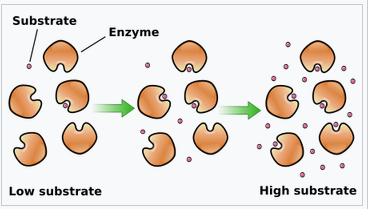

Figure 3. Schematic of enzyme kinetics at the example of Michaelis-Menten kinetics https://en.wikipedia.org/wiki/Enzyme_kinetics#/media/File:KinEnzymo(en).svg

Michaelis-Menten kinetics is defined by the following term. $v = \frac{dp}{dt} = \frac{k_{cat}~E~S}{K_m + S}$. For low S, the equation is governed by the numerator and $\frac{k_{cat}}{K_m}$ is known as the specificity constant that explains how efficiently the substrate is converted into the product. Using the full equation would be more desirable, to describe also the saturated phase of the enzymatic metabolization of the chemical. In this model, we resort to the most simple equation, where the decay linearly depends on the product of enzyme and substrate. The most important reason for this decision is that neither data for the enzyme(s) nor for the reaction product is available.

With further data availability, such as measured metabolites of the chemical, more advanced enzyme kinetics could be described. Another limitation of this model is that in reality certainly more than one enzyme will be responsible for the degradation. It is highly recommended that a better resolved elimination process (passive and active elimination) is investigated in depth in future versions of the model.

#### Gene expression and decay

While internal concentrations varied over 3 orders of magnitude between the different substances, *nrf2* expression varied within 1 order of magnitude. This observations are in line with the understanding that gene-transcription follows zero order kinetics [Qiu.2022,Xu.2023a], which effectively decouples it from the magnitude of the internal concentrations. In addition, *nrf2* expression showed pulse like patterns, which elicits the inclusion of a deactivation of expression (Eq. 2). This combined process of *nrf2* transcription, we therefore chose to model as a zero order kinetic, activated by a concentration dependent sigmoid function.

$$activation(C_i,~C_{i,max},~z_{ci}, ~v_{rt}) = 0.5 + \frac{1}{\pi} ~ arctan(v_{rt} ~ (\frac{C_i}{C_{i,max}} - z_{ci}))$$

where the threshold $z_{ci}$ and slope $v_{rt}$ are fittable parameters. This process is also illustrated in the graphical model description and understands that there is a maximum cellular capacity for expression of the *nrf2* gene. The activation of expression however is concentration dependent.

RNA decay is modeled as a first-order kinetic decay equation, which is in agreement with concentionally applied RNA decay models [Chen.2008,Blake.2024].

With the assumptions of a threshold-triggered activation of 0th-order gene-transcription (expression) and 1st order RNA-decay, the model is capable of increasing RNA-concentration after exposure to toxicants and depleting it again after the concentration falls below a threshold. Because the concentration of RNA-expression is indirectly coupled to the elimination of the compound, various patterns of internal concentration dynamics and gene-expression dynamics under constant exposure concentrations can be modeled.

The model is limited by describing only *nrf2* as a driver of the stress response. In reality, other genes also contribute to the stress response. Other important genes in the stress response are CYP1A, CYP1B, CYP1C, GST and UGT.

Due to experimental constraints it is not possible to measure the absolute copy number of RNA transcripts in an organism and give a concentration. Instead, the gene-expression is always given relative to the control organism as a multiple (fold-change) which is 1 in an unchanged state. This requires modeling the gene-expression system also in fold-change units relative to the basline of $R_0 = 1$.

#### Protein dynamics

On a biological level, the metabolization of a chemical is not driven by the concentration of *nrf2* transcripts, but by downstream products. After transcription (and activation), *nrf2* dissociates into the nucleus and activates the expression of other genes, so called antioxidant response elements (ARE). These genes are translated to proteins that handle the stress response, including enzymes like catalases, gluthathionperoxidases, and peroxidates.
All processes involved in the active detoxification rate are aggregated into a single quantity $P$, which changes depending on the *nrf2* concentration and the metabolizing protein concentration with a dominant rate constant $k_p$ (Eq. 3). This equation is included to describe the process that metabolization can persist after the transient gene-regulation pulse has passed. This decision is based on insights that proteins have half-lifes of 20-46 hours [Harper.2016], while *nrf2* RNA transcripts have approximated half-lifes of only 20 minutes [Kobayashi.2004].

#### Survival functions

The survival probability $S$ (Eq. 5) is modeled according to the stochastic death assumption of the GUTS framework [Jager.2011,Jager.2018], where the hazard is approximated by nrf2 fold-change (Eq. 4). The given equations are standard textbook functions of the survival analysis and will not be explained in detail.

### Model parameters

TKTD Parameters used in the GUTS-RNA-pulse model. The column `Assumed substance independence` indicates whether a parameter is supposed to be shared for multiple  substances.
| Parameter              | Definition | Unit | Assumed substance independence  |
|------------------------|------------|------|---------------------------------|
| ${k}_{i}$              | Uptake rate constant of the chemical into the internal compartment of the ZFE | $h^{-1}$ | no  |
| ${k}_{m}$              | Metabolization rate constant from the internal compartment of the ZFE| $\frac{L}{\mu mol~h}$ | no  |
| ${z}_{\text{ci}}$      | Scaled internal concentration threshold for the activation of *nrf2* expression | $\frac{\mu mol~L^{-1}}{\mu mol~L^{-1}}$ | no  |
| ${v}_{\text{rt}}$      | Scaled responsiveness of the *nrf2* activation (slope of the activation function) | $\frac{\mu mol~L^{-1}}{\mu mol~L^{-1}}$ | yes/no $^a$  |
| ${r}_{\text{rt}}$      | Constant *nrf2* expression rate after activation $^b$ | fc $^c$ | yes  |
| ${k}_{\text{rd}}$      | Nrf2 decay rate constant | $h^{-1}$ | yes  |
| ${k}_{p}$              | Dominant rate constant of synthesis and decay of metabolizing proteins | $h^{-1}$ | yes  |
| ${z}$                  | Effect *nrf2*-threshold of the hazard function $^b$ | fc $^c$ | yes  |
| ${k}_{k}$              | killing rate constant for *nrf2* $^b$ | $fc^{-1}~h^{-1}$ $^c$ | yes |
| ${h}_{b}$              | background hazard rate constant | $h^{-1}$ | yes  |
| $\sigma_{\text{cint}}$ | Log-normal error of the internal concentration | | yes  |
| $\sigma_{nrf2}$        | Log-normal error of the *nrf2* expression $^b$ | | yes  |

a: In an unscaled version of the activation function, $v_{rt}$ is not considered substance independent, due to an inverse relationship between $v_{rt}$ and $C_{i,max}$ 

b: relative to the *nrf2* concentration in untreated ZFE (fold-change)

c: fold change: $\frac{\mu mol~Nrf2\text{-treatment}~L^{-1}}{\mu mol~Nrf2\text{-control}~L^{-1}}$ 

### Caveats 💥

1. When calculating treatment effects it should be made sure that effects are calculated differentially to the initial value of the RNA expression
2. When $R_0 \neq 1$, the RNA expression has to be divided by the baseline to obtain fold-change values, after the ODE has been solved.


## Implementation

For the implementation of the model the package `pymob` was developed. Pymob is publically available on github https://github.com/flo-schu/pymob and deployed on PyPi https://pypi.org/project/pymob/. The documentation for pymob is available on https://pymob.readthedocs.io/en/latest/
Parameter recover of implemented inference methods are tested on the Lotka-Volterra model as a basic example, and is included in the repository. 

The implementation describes case studies (models with datasets) and scenarios (parameterizations, exposures, inference-procedures). Case studies are self-contained building blocks and describe the simulation (sim.py) deterministic model (mod.py), proabilistic error models (prob.py), plotting functions (plot.py) and datasets (data.py) in a modular way. Scenarios are given in config files. The data and results are traced with `datalad` so that data and results can be traced and reproduced for developing versions of the model.

In the following the GUTS-RNA-pulse (3.6c) model is fitted to data and analyzed with the `pymob` framework.

In [2]:
import os
import json
import warnings
from functools import partial

import numpy as np
import arviz as az
import matplotlib as mpl
from matplotlib import pyplot as plt

from pymob import Config
from tktd_rna_pulse.sim import SingleSubstanceSim3

# Ignore warnings and change working directory to the root of the case study
warnings.filterwarnings("ignore")

The **substance-specific** scenario is loaded for the case study **tktd-rna-pulse** 
The model described above is specified in the pymob framework in the function `tktd_rna_3_6c` in the module `case_studies.tktd_rna_pulse.mod`

In [3]:
# initialize the case study and insert the model
config = Config("../scenarios/rna_pulse_5_substance_specific/settings.cfg")
# change the package directory, because working in a jupyter notebook sets the root to the folder of the working directory
# the package gives the base directory of the case-study
config.case_study.package = "../.."

sim = SingleSubstanceSim3(config)
sim.setup()

MinMaxScaler(variable=cint, min=0.0, max=6364.836264471382)
MinMaxScaler(variable=nrf2, min=0.0, max=3.806557074337876)
MinMaxScaler(variable=survival, min=0.0, max=18.0)
Results directory exists at '/home/flo-schu/projects/pymob/case_studies/tktd_rna_pulse/results/rna_pulse_5_substance_specific'.
Scenario directory exists at '/home/flo-schu/projects/pymob/case_studies/tktd_rna_pulse/scenarios/rna_pulse_5_substance_specific'.


## Solving the model with the autodifferentiation frameworks JAX and diffrax

JAX (http://jax.readthedocs.io/) is a autodifferentiation framwork that just-in-time (jit) compiles python code (~ 10s) into highly efficient numerical expressions. Diffrax (https://docs.kidger.site/diffrax/) is built on JAX and leverages this platform to provide solutions to ordinary differential equation (ODE) systems, including their sensitivities with respect to the parameters. In mod.py the diffrax based solver is described and handles the indexing and broadcasting of parameters from the model fitting to the complex case of fitting models to scattered data structures.

For each model evaluation (for all experiments) `pymob` dispatches an evaluator with a given set of parameter values and other optional arguments, that need to be specified in the solver. The evaluator stores the simulation output in its native form (here a dictionary) and can convert dictionaries to numpy arrays, based on the provided data dimensionality in the configuration file.

In [4]:
from dataclasses import dataclass
from pymob.solvers.diffrax import JaxSolver

@dataclass(frozen=True)
class Solver(JaxSolver):
    rtol: float = 1e-3
    atol: float = 1e-6
    batch_dimension: str = "id"

In [5]:
sim.solver = Solver
sim.model_parameters["parameters"] = sim.config.model_parameters.value_dict
sim.dispatch_constructor()
evaluator = sim.dispatch(theta={})
evaluator()

evaluator.results

<xarray.Dataset>
Dimensions:          (id: 202, time: 23)
Coordinates:
  * id               (id) object '101_0' '101_1' '106_0' ... '66_4' '66_5' '6_0'
  * time             (time) float64 24.0 25.5 27.0 30.0 ... 114.0 117.0 120.0
    hpf              (id) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0 24.0
    nzfe             (id) float64 nan nan nan nan nan ... 9.0 9.0 9.0 9.0 20.0
    treatment_id     (id) int64 101 101 106 106 112 112 118 ... 66 66 66 66 66 6
    experiment_id    (id) int64 36 36 36 36 36 36 36 36 ... 27 27 27 27 27 27 1
    substance        (id) <U10 'diuron' 'diuron' ... 'naproxen' 'naproxen'
    substance_index  (id) int64 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2
Data variables:
    cext             (id, time) float32 2.34 2.34 2.34 ... 349.5 349.5 349.5
    cint             (id, time) float32 0.0 1.755 3.51 ... 1.502e+04 1.546e+04
    nrf2             (id, time) float32 1.0 1.028 1.042 ... 1.199 1.2 1.199
    P                (id, time) float32 0.0 0.001166 0.003685 ... 0.1966 0.1972
    H                (id, time) float32 0.0 0.0004788 0.001558 ... 0.3338 0.3459
    survival         (id, time) float32 1.0 0.9995 0.9984 ... 0.7162 0.7076

By using JAX, the 202 ODE systems needed to integrate all datasets into one model could be evaluated very efficiently resulting in a model evaluation time of 10 ms for 1 iteration after compilation.

In [22]:
sim.benchmark(n=100)


Benchmarking with 100 evaluations
Starting Benchmark(time=2025-03-01 18:02:22, )
Finished Benchmark(runtime=1.2536749839782715s, cputime=1.2531372069999804s, ncores=4



## Numpyro framwork for bayesian parameter inference

Because diffrax solvers provide gradients of the solutions of an ODE system with respect to its parameters it is possible to use gradient based solvers in conjuction with the ODE solvers. This makes enables us to use gradient based bayesian estimation techniques to assess the uncertainty of the parameters. The most prominent gradient based solver is the No-U-Turn-Sampler (NUTS) by Hofman and Gelman [Hoffman.2011]. It is implemented in the inference framework `numpyro` that is used for this case study.  

In [7]:
# set up the inferer properly
sim.coordinates["time"] = sim.observations.time.values
sim.dispatch_constructor()
sim.set_inferer("numpyro")

Jax 64 bit mode: False
Absolute tolerance: 1e-06



First of all prior predictions are generated. These are helpful to diagnose
the model and also to compare posterior parameter estimates with the prior
distributions. If there is a large bias, this information can help to achieve
a better model fit.

In [8]:
# set the inference model
seed = 1
prior_predictions = sim.inferer.prior_predictions(n=100, seed=seed)

### Problems of gradient based samplers for complex models and large amounts of data

Still a computational problem remains, because for using NUTS, the likelihood function (and its gradients) need to be computed for each data point.
In the given dataset, this means 1426 gradient evaluations with respect to all model parameters per leapfrog step (the number of leapfrosteps varied between 1--1023 per iteration).
This easily scales to dimensions where gradient based MCMC approaches, like NUTS have difficulties, especially when the ODE model and therefore the likelihood function and its gradients, becomes more complex.
For simple problem like the 4-parameter GUTS model $k_d$, $k_k$, $h_b$, $z$, solving the problem with a NUTS approach is feasible (walltime $\approx 30$ minutes), but with more complex models with higher number of parameters, NUTS approaches quickly becomes infeasible (walltime > 48 h). 
In these situation, posteriors were approximated with stochastic variational inference (SVI) [Blei.2017], which estimates posterior distributions, based on finding a parametric distribution that approximates the true, unknown posterior distribution.
While these methods, are constrained to deliver parametric posteriors, they were in good agreement with the posteriors produced by the NUTS algorithm.

### Estimating the parameters with MAP and SVI

In the next step, we take the full model, including deterministic ODE solution and error model and run our maximum-a-posteriori (MAP) estimator on it, with the parameters that have been setup before. The MAP estimator converges of the modes of the parameter distributions (so the most likely value) and *only* differs from maximum likelihood methods in that way that it also accounts for the assumed prior distributions. Note that if the priors were unconstrained uniform the method would be equivalent to the maximum likelihood method (and be only guided by the data).

Because of the speed of the diffrax solver, the model can be fitted in reasonable time (< 5 minutes)

#### Using MAP

| 🛑 | Are you getting a `Permission denied` error when executing the next cell? This is caused by locked results files by `datalad`. Follow the installation instructions in the README 📝. The clue is to unlock 🔓 the results folder: `datalad unlock case_studies/tktd_rna_pulse/results` |
|----|---|

                  Trace Shapes:         
                   Param Sites:         
                  Sample Sites:         
 k_i_substance_normal_base dist      3 |
                          value      3 |
r_rt_substance_normal_base dist      3 |
                          value      3 |
r_rd_substance_normal_base dist      3 |
                          value      3 |
v_rt_substance_normal_base dist      3 |
                          value      3 |
z_ci_substance_normal_base dist      3 |
                          value      3 |
 k_p_substance_normal_base dist      3 |
                          value      3 |
 k_m_substance_normal_base dist      3 |
                          value      3 |
 h_b_substance_normal_base dist      3 |
                          value      3 |
   z_substance_normal_base dist      3 |
                          value      3 |
  kk_substance_normal_base dist      3 |
                          value      3 |
    sigma_cint_normal_base dist        |
                

100%|██████████| 500/500 [00:16<00:00, 30.41it/s, init loss: 6928.1533, avg. loss [476-500]: 622.9951] 
arviz - WARNING - Shape validation failed: input_shape: (1, 1), minimum_shape: (chains=1, draws=4)


                                mean  sd    hdi_3%   hdi_97%  mcse_mean  \
ci_max[101_0]               1757.000 NaN  1757.000  1757.000        NaN   
ci_max[101_1]               1757.000 NaN  1757.000  1757.000        NaN   
ci_max[106_0]               1757.000 NaN  1757.000  1757.000        NaN   
ci_max[106_1]               1757.000 NaN  1757.000  1757.000        NaN   
ci_max[112_0]               1757.000 NaN  1757.000  1757.000        NaN   
...                              ...  ..       ...       ...        ...   
z_ci_substance[diclofenac]     1.383 NaN     1.383     1.383        NaN   
z_ci_substance[naproxen]       1.950 NaN     1.950     1.950        NaN   
z_substance[diuron]            1.500 NaN     1.500     1.500        NaN   
z_substance[diclofenac]        2.109 NaN     2.109     2.109        NaN   
z_substance[naproxen]          2.678 NaN     2.678     2.678        NaN   

                            mcse_sd  ess_bulk  ess_tail  r_hat  
ci_max[101_0]                   Na

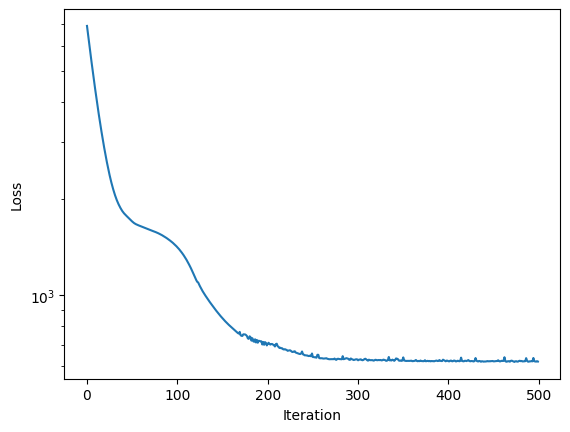

In [9]:
# set the inference model
sim.config.inference_numpyro.kernel = "map"
sim.config.inference_numpyro.svi_iterations = 500
sim.config.inference_numpyro.svi_learning_rate = 0.01
sim.dispatch_constructor(throw_exception=False)
sim.inferer.run()

In [10]:
# show (and explore idata)
print(sim.inferer.idata)

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> observed_data
	> unconstrained_posterior
	> posterior_model_fits
	> posterior_residuals
	> posterior
	> posterior_predictive
	> log_likelihood
	> observed_data
	> posterior_model_fits
	> posterior_residuals


We see that the loss curve has quickly converged on the best value, so with the learning rate, we applied, we could probably get the correct inference with fewer iterations. Using the MAP estimator is an excellent way to do model development in a bayesian setting. It gets rid of long parameter estimation runtimes and incorporates prior distributions in the fitting procedure.

#### Posterior predictions

In order to evaluate the goodness of fit for the posteriors, we are looking
at the posterior predictions.

In order to obtain smoother trajectories, the time resolution is increased,
and posterior predictions are calculated.

In [11]:
sim.coordinates["time"] = np.linspace(24, 120, 100)
sim.config.inference.n_predictions = 1
seed = int(np.random.random_integers(0, 100, 1))

sim.dispatch_constructor()
res = sim.inferer.posterior_predictions(n=1, seed=seed).mean(("draw", "chain"))
print(res)

Posterior predictions:   0%|          | 0/1 [00:00<?, ?it/s]

Posterior predictions: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

<xarray.Dataset>
Dimensions:          (id: 202, time: 100)
Coordinates:
  * id               (id) object '101_0' '101_1' '106_0' ... '66_4' '66_5' '6_0'
  * time             (time) float64 24.0 24.97 25.94 26.91 ... 118.1 119.0 120.0
    hpf              (id) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0 24.0
    nzfe             (id) float64 nan nan nan nan nan ... 9.0 9.0 9.0 9.0 20.0
    treatment_id     (id) int64 101 101 106 106 112 112 118 ... 66 66 66 66 66 6
    experiment_id    (id) int64 36 36 36 36 36 36 36 36 ... 27 27 27 27 27 27 1
    substance        (id) <U10 'diuron' 'diuron' ... 'naproxen' 'naproxen'
    substance_index  (id) int64 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2
Data variables:
    cext             (id, time) float32 2.34 2.34 2.34 ... 349.5 349.5 349.5
    cint             (id, time) float32 0.0 12.11 24.19 ... 2.481e+03 2.434e+03
    nrf2             (id, time) float32 1.0 1.075 1.118 ... 3.414 3.387 3.359
    P                (id, time) float32 0.

Next, we plot the predictions against some selected experiments, in order to not be overwhelmed by the data. Note that the observations,
may be slightly diverging from the MAP predictions, because
+ the model is not completely correct
+ other (not displayed) data *pull* the posterior estimate away from the displayed data.

You can select different experiments in the `experiment_selection_1.json` file (or provide a different file).

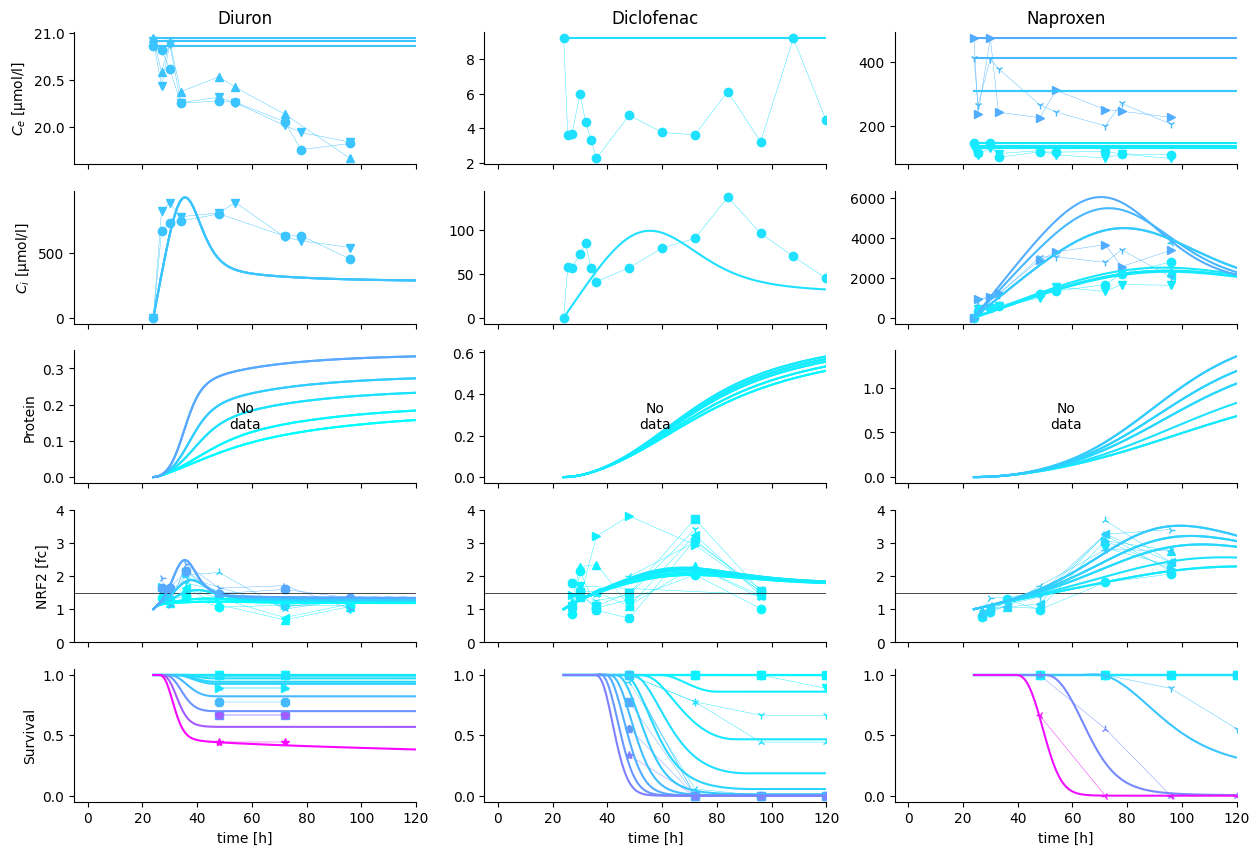

In [12]:
with open(sim.scenario_path + "/experiment_selection_1.json", "r") as fp:
    data_structure = json.load(fp)
    
res = res.assign_coords({"substance": sim.observations.substance})
cmap = mpl.colormaps["cool"]
fig, axes = plt.subplots(len(data_structure), 3, sharex=True, figsize=(15,10))


for r, (v, vdict) in enumerate(data_structure.items()):
    for c, (s, sdict) in enumerate(vdict["substances"].items()):
        sdata = sim.observations.where(sim.observations.substance == s, drop=True)
        C = np.round(sdata.cext_nom.values, 1)
        norm = mpl.colors.Normalize(vmin=C.min(), vmax=C.max())
        for eid in sdict["experiment_ids"]:

            ax, meta, obs_ids, _ = sim._plot.plot_experiment(
                self=sim,
                experiment_id=eid,
                substance=s,
                data_var=v,
                cmap=cmap,
                norm=norm,
                ax=axes[r, c]
            )

            if v != "survival":
                ax.set_xlabel("")

            if v == "P":
                ax.set_ylabel("Protein")
                ax.spines[["right", "top"]].set_visible(False)

            if v == "nrf2":
                ax.set_ylim(0, 4)
                # note that the thresholds are mixed up. Diuron and Diclofenac should swap
                z = sim.inferer.idata.posterior.z.mean(("chain", "draw")).values
                ax.hlines(z[c], -10, 120, color="black", lw=0.5)

            if c != 0:
                ax.set_ylabel("")

            l = ax.get_legend()
            if l is not None:
                l.remove()
            if v == "cext":
                ax.set_title(s.capitalize())
            else:
                ax.set_title("")

            res_ids = sim.get_ids(res, {"substance": s, "experiment_id": eid})

            for i in res_ids:
                y = res.sel(id=i)
                ax.plot(res.time, y[v], color=cmap(norm(y.cext.isel(time=0))))


In this figure, we can perfectly see, what is still missing in the model. 

+ Diuron can only model the decay dynamic with an initial overshoot of internal concentrations
+ Multiphase internal concentration dynamics (Diclofenac, Naproxen) cannot be modelled with the simple assumptions taken
+ Secondary pulse in Diuron *nrf2* expression cannot be modeled with the current assumptions. Two major hypotheses compete for explanation: 1. Secondary metabolites re-active *nrf2*. 2. Early stage activation of nascent *nrf2* transcripts bound to KEAP1 proteins explain the first pulse, followed by a second pulse from sustained chemical concentration in the cytoplasm.

Nevertheless, note that the experiments, integrated here into a single model originate from 7 years of experimental work. The resulting experimental uncertainty is bound to be significant, explaining the large variation in observations. 

#### Assessing uncertainty using SVI

SVI converges on a posterio much faster than NUTS and is suited to analyse the uncertainty of the posterior.

                  Trace Shapes:         
                   Param Sites:         
                  Sample Sites:         
 k_i_substance_normal_base dist      3 |
                          value      3 |
r_rt_substance_normal_base dist      3 |
                          value      3 |
r_rd_substance_normal_base dist      3 |
                          value      3 |
v_rt_substance_normal_base dist      3 |
                          value      3 |
z_ci_substance_normal_base dist      3 |
                          value      3 |
 k_p_substance_normal_base dist      3 |
                          value      3 |
 k_m_substance_normal_base dist      3 |
                          value      3 |
 h_b_substance_normal_base dist      3 |
                          value      3 |
   z_substance_normal_base dist      3 |
                          value      3 |
  kk_substance_normal_base dist      3 |
                          value      3 |
    sigma_cint_normal_base dist        |
                

100%|██████████| 5000/5000 [01:26<00:00, 57.71it/s, init loss: 6351.0991, avg. loss [4751-5000]: 712.7646]    
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


                                mean     sd    hdi_3%   hdi_97%  mcse_mean  \
ci_max[101_0]               1757.000  0.000  1757.000  1757.000      0.000   
ci_max[101_1]               1757.000  0.000  1757.000  1757.000      0.000   
ci_max[106_0]               1757.000  0.000  1757.000  1757.000      0.000   
ci_max[106_1]               1757.000  0.000  1757.000  1757.000      0.000   
ci_max[112_0]               1757.000  0.000  1757.000  1757.000      0.000   
...                              ...    ...       ...       ...        ...   
z_ci_substance[diclofenac]     0.969  0.080     0.827     1.125      0.003   
z_ci_substance[naproxen]       1.704  0.082     1.559     1.871      0.003   
z_substance[diuron]            1.474  0.089     1.306     1.645      0.003   
z_substance[diclofenac]        2.248  0.072     2.116     2.386      0.002   
z_substance[naproxen]          2.767  0.147     2.506     3.054      0.005   

                            mcse_sd  ess_bulk  ess_tail  r_hat 

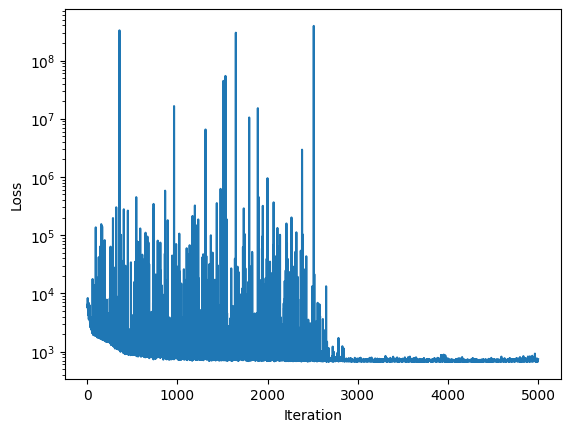

In [27]:
# set the inference model
sim.config.inference_numpyro.kernel = "svi"
sim.config.inference_numpyro.svi_iterations = 5_000
sim.config.inference_numpyro.svi_learning_rate = 0.005
sim.coordinates["time"] = sim.observations.time.values
sim.dispatch_constructor(throw_exception=False)
sim.inferer.run()

In [28]:
sim.inferer.store_results(f"{sim.output_path}/numpyro_svi_posterior.nc")

#### Posterior predictions with uncertainty intervals of a single estimate

Although the estimates under parameter identifiability issues are not reliable, we can still plot the results

Deleted 'lethality' DataVariable(dimensions=['id', 'time'] min=0.0 max=18.0 observed=False dimensions_evaluator=None).
PRETTY PLOT: starting...


Posterior predictions: 100%|██████████| 100/100 [00:05<00:00, 19.23it/s]


PRETTY PLOT: make predictions for Diuron in bin (1/5)
PRETTY PLOT: make predictions for Diuron in bin (2/5)
PRETTY PLOT: make predictions for Diuron in bin (3/5)
PRETTY PLOT: make predictions for Diuron in bin (4/5)
PRETTY PLOT: make predictions for Diuron in bin (5/5)


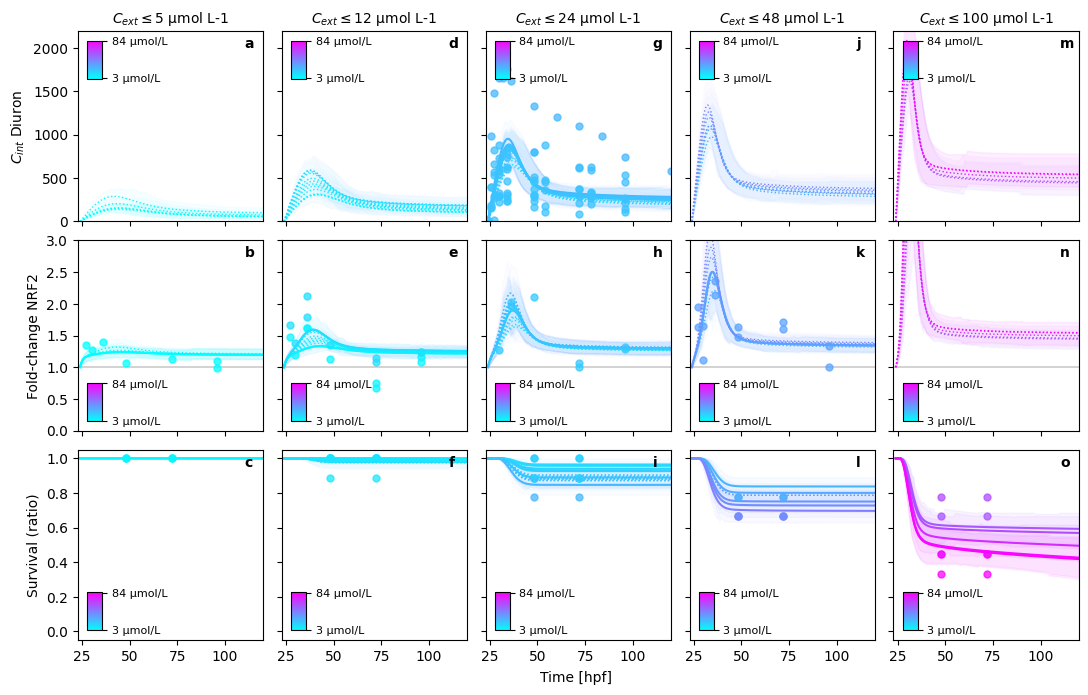

PRETTY PLOT: make predictions for Diclofenac in bin (1/4)
PRETTY PLOT: make predictions for Diclofenac in bin (2/4)
PRETTY PLOT: make predictions for Diclofenac in bin (3/4)
PRETTY PLOT: make predictions for Diclofenac in bin (4/4)


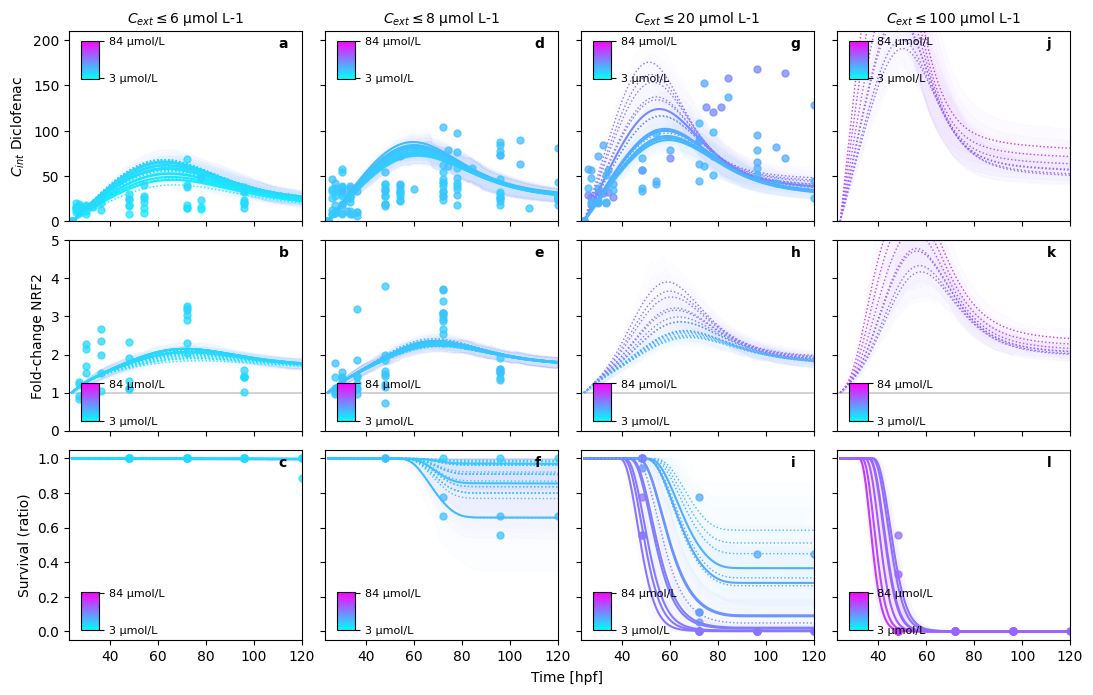

PRETTY PLOT: make predictions for Naproxen in bin (1/6)
PRETTY PLOT: make predictions for Naproxen in bin (2/6)
PRETTY PLOT: make predictions for Naproxen in bin (3/6)
PRETTY PLOT: make predictions for Naproxen in bin (4/6)
PRETTY PLOT: make predictions for Naproxen in bin (5/6)
PRETTY PLOT: make predictions for Naproxen in bin (6/6)


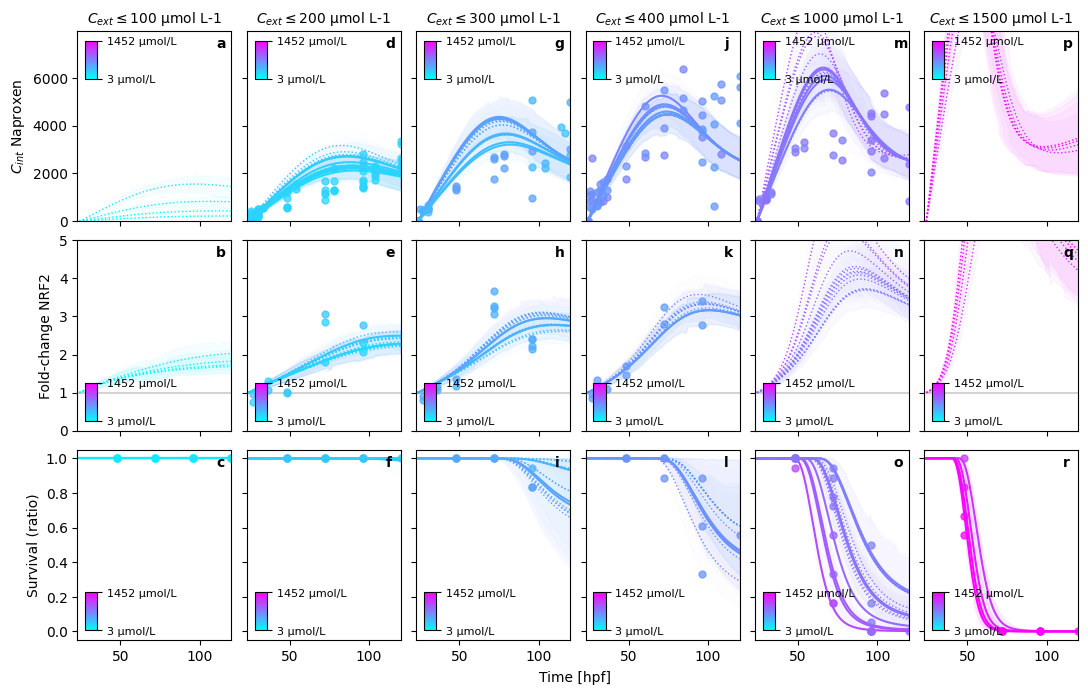

In [29]:
sim.config.inference.n_predictions = 100
sim.coordinates["time"] = np.linspace(24, 120, 200)
sim.seed=1
sim.config.data_structure.remove("lethality")
sim.dispatch_constructor()
_ = sim._plot.pretty_posterior_plot_multisubstance(sim, save=False, show=True)